## Customer Subscription Management System
- Data generated using Faker in Python.
- This UI Interacts with the SQL Application and retirves the result as required.
- The retrived results can be visualized accordingly to solve Business Problems

### Import the necessary Libraries

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import schedule as sch
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

### Connect to the SQL Server

In [2]:
connection = pymysql.connect(host='localhost',user='root',password='Vickymoneyheist@091',db='cl_management')
cursor = connection.cursor()

### 1. Query with Join that uses 3 Tables

In [3]:
x  = widgets.Textarea(value='',placeholder='Type Your Query here',description='Query:',disabled=False)

- **Query to be put in the text box**\
select 
a.region, c.revenue_type,
sum(c.gross_arr_in_usd) as total_revenue from user a 
inner join subscription b on a.user_id = b.user_id 
inner join revenue c on b.subscription_id = c.subscription_id
group by 1,2
order by 1,2 desc;

In [4]:
x

Textarea(value='', description='Query:', placeholder='Type Your Query here')

Text(0.5, 1.0, 'Total Revenue by Region and Revenue Type')

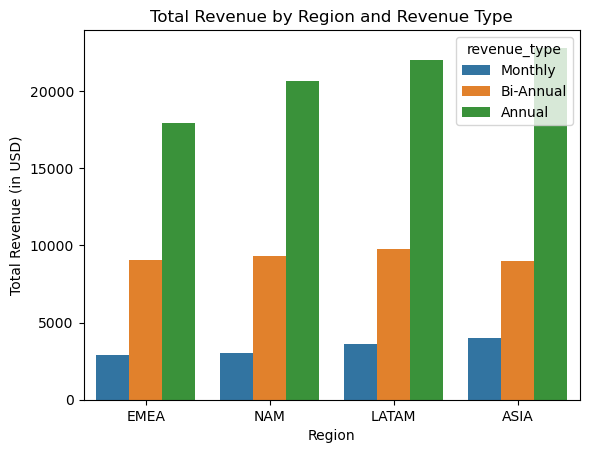

In [5]:
#Call the Query to execute the query in the textbox above.
cursor.execute(x.value)
results = cursor.fetchall()
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

#Convert the results to a DataFrame
df = pd.DataFrame(results,columns = field_names)
df['total_revenue'] = df['total_revenue'].astype('int')

#Visualize the results
df.sort_values('total_revenue',inplace=True)
ax = sns.barplot(data = df,x='region',y='total_revenue',hue='revenue_type')
ax.set(ylabel='Total Revenue (in USD)', xlabel='Region')
ax.set_title('Total Revenue by Region and Revenue Type')

### 2. Query to fetch all the Activities of a given User
- The end user gives the User ID as the input.
- Returns the result if a records exists for that user else throws an exception.

In [6]:
# Function to execute SQL query with user ID
def execute_sql_query(b):
    user_id = text_box.value
    sql = "select a.user_id, sum(case when activity_type = 'Installed' then 1 else 0 end) as installs, sum(case when activity_type = 'Downloaded' then 1 else 0 end) as downloads,sum(case when activity_type = 'Launched' then 1 else 0 end) as launches from user a inner join activities b on a.user_id = b.user_id where a.user_id = '{}' group by 1 order by 1".format(user_id)
    cursor.execute(sql)
    results = cursor.fetchall()
    try:
        resultdict= {'user_id':results[0][0],
                'installs':int(results[0][1]),
                'Downloads':int(results[0][2]),
                'launches':int(results[0][3])}
        print(resultdict)
    except:
        print('The User does not have an Activity')
# Create a text box for user input
text_box = widgets.Text(
    value='',
    description='User ID:',
    disabled=False
)

# Create a button to trigger the SQL query
button = widgets.Button(description='Execute Query')
button.on_click(execute_sql_query)

# Display the widgets
display(text_box, button)


Text(value='', description='User ID:')

Button(description='Execute Query', style=ButtonStyle())

{'user_id': 'C2496', 'installs': 1, 'Downloads': 1, 'launches': 2}


### 3. Call the Function to Fetch the Revenue generated from the Product Name:
- Fetches the Revenue in USD for the Product Name given by the user as Input.

In [7]:
# Function to execute SQL query with user ID
def get_prod_revenue(b):
    product_name = text_box.value
    sql = "SELECT PRODUCT_REVENUE('{}') AS product_revenue;".format(product_name)
    cursor.execute(sql)
    results = cursor.fetchall()
    try:
        print("The Revenue generated for {} is : $ {}".format(product_name,results[0][0]))
    except:
        print('The User does not have an Activity')
# Create a text box for user input
text_box = widgets.Text(
    value='',
    description='Product Name:',
    disabled=False
)

# Create a button to trigger the SQL query
button = widgets.Button(description='Call Function')
button.on_click(get_prod_revenue)

# Display the widgets
display(text_box, button)


Text(value='', description='Product Name:')

Button(description='Call Function', style=ButtonStyle())

The Revenue generated for Product7 is : $ 13433.32


### 4. Call the Trigger to record an "Email-sent" event when a New User Joins!
- When a User enters the Subscription Universe of the Company, the Business sends out a Welcome Email to the User!
- The End User enters the details of the subscriber

In [8]:
# Function to execute SQL query with user ID
def execute_sql_query(b):
    user_id = useridbox.value
    insertquery = "Insert into user values('{}','{}',{},'{}','{}','{}','{}')".format(useridbox.value,usernamebox.value,
                                                                                     int(agebox.value),emailidbox.value,
                                                                      regionbox.value,categorybox.value,genderbox.value)
    cursor.execute(insertquery)
    ## Trigger gets called after insert
    selectquery = "select * from touched_by where user_id = '{}' and campaign_id = 4".format(useridbox.value)    
    cursor.execute(selectquery)
    results = cursor.fetchall()
    print("User {} has joined the Subscription Universe".format(useridbox.value))
    print("Sending them a Welcome Email")
    email_dict = {'User ID':results[0][0],
                 'Campaign ID':results[0][1],
                 'Tocuhed Date':results[0][2]}
    print(email_dict)
# Create a text box for user input
useridbox = widgets.Text(value='',description='User ID:',disabled=False)
usernamebox = widgets.Text(value='',description='User Name:',disabled=False)
agebox = widgets.Text(value='',description='Age:',disabled=False)
emailidbox = widgets.Text(value='',description='Email ID:',disabled=False)
regionbox = widgets.Text(value='',description='Region:',disabled=False)
categorybox = widgets.Text(value='',description='Category:',disabled=False)
genderbox = widgets.Text(value='',description='Gender:',disabled=False)

# Create a button to trigger the SQL query
button = widgets.Button(description='Execute Query')
button.on_click(execute_sql_query)

# Display the widgets
display(useridbox,usernamebox,agebox,emailidbox,regionbox,categorybox,genderbox,button)


Text(value='', description='User ID:')

Text(value='', description='User Name:')

Text(value='', description='Age:')

Text(value='', description='Email ID:')

Text(value='', description='Region:')

Text(value='', description='Category:')

Text(value='', description='Gender:')

Button(description='Execute Query', style=ButtonStyle())

User C7800 has joined the Subscription Universe
Sending them a Welcome Email
{'User ID': 'C7800', 'Campaign ID': 4, 'Tocuhed Date': datetime.date(2023, 12, 8)}


### 5. Call the Stored Procedure to send a "Subscription Expiration Reminder Email"
- Calls a Stored Procedure that automatically sends a Subscription Expiration Reminder Email today to those users with an expiry date tomorrow.

In [9]:
# Function to execute SQL query with user ID
result_dict = []
sql = "call job_expiration_reminder()"
cursor.execute(sql)
check_query = 'SELECT * from touched_by where campaign_id = 10;'
cursor.execute(check_query)
exp_results = cursor.fetchall()
df3 = pd.DataFrame(exp_results, columns=['User ID', 'Campaign ID','Touch Date'])
#Print the results
df3

,User ID,Campaign ID,Touch Date
0,C2455,10,2023-01-21
1,C2522,10,2023-01-01
2,C2525,10,2022-06-27
3,C2556,10,2023-11-01
4,C2566,10,2023-07-14
...,...,...,...
60,C2592,10,2023-12-08
61,C2889,10,2023-12-08
62,C2780,10,2023-12-08
63,C2797,10,2023-12-08


- We can also schedule the Job to run every day at 10:30!

In [10]:
# Scheduled job for the same action above.
def run_job_expiration_reminder():
    sql = "call job_expiration_reminder()"
    cursor.execute(sql)
sch.every().day.at("10:30").do(run_job_expiration_reminder)

Every 1 day at 10:30:00 do run_job_expiration_reminder() (last run: [never], next run: 2023-12-08 10:30:00)

### 6. Plot the Activities of the Users over the period of a Year

Text(0.5, 1.0, 'Total Activities Users every Month')

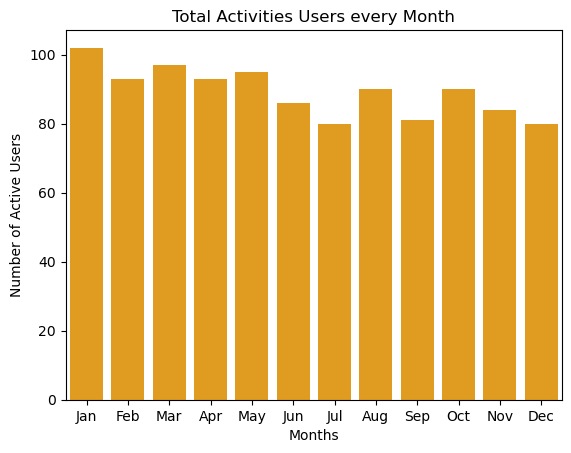

In [11]:
#define the query to
query_new = "select month(activity_date) as month_of_the_year, count(distinct user_id) as active_users from activities group by 1 order by 1" 
#execute the query and fetch the result
cursor.execute(query_new)
res = cursor.fetchall()
df5 = pd.DataFrame(res, columns=['Month', 'Number of Active Users'])
df5['Months'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#visualize the results
ax1 = sns.barplot(x=df5['Months'],y=df5['Number of Active Users'],color='orange')
ax1.set_title('Total Activities Users every Month')

### 7. Number of users who received 'k' emails.

Text(0.5, 1.0, "Number of users who received 'k' Emails")

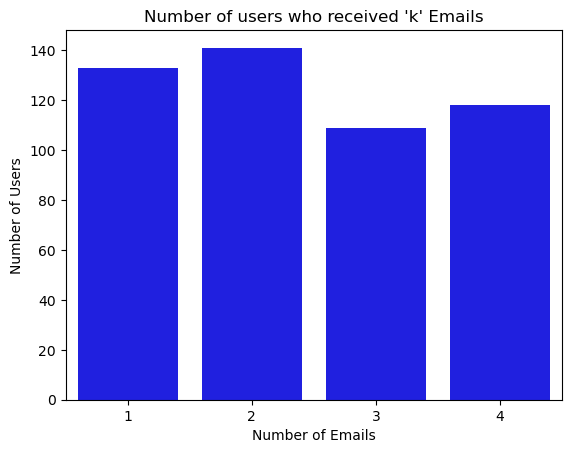

In [12]:
qr = "select touch_dates, count(distinct user_id) as users from (select user_id, count(distinct touch_date) as touch_dates from touched_by group by 1) a group by 1"
cursor.execute(qr)
#execute the query and fetch the result
res = cursor.fetchall()
df6 = pd.DataFrame(res, columns=['Number of Emails', 'Number of Users'])
#visualize the results
ax1 = sns.barplot(x=df6['Number of Emails'],y=df6['Number of Users'],color='blue')
ax1.set_title('Number of users who received \'k\' Emails')

- We can see that most users received 2 emails.

### 8. Distribution of Revenue Generated by the Category of users.
- Gets the Annual Revenue generated for the Users by category.

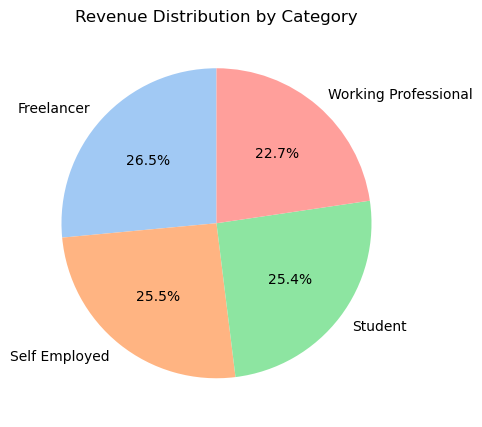

In [13]:
#define the query
qr_revenue_by_cat = '''select a.category, sum(c.gross_arr_in_usd)
from user a inner join subscription b 
on a.user_id =b.user_id 
inner join revenue c on b.subscription_id = c.subscription_id 
group by 1 order by 1'''
#execute the query and fetch the result
cursor.execute(qr_revenue_by_cat)
res = cursor.fetchall()
df7 = pd.DataFrame(res, columns=['Category', 'Revenue Generated'])
#visualize the result
plt.figure(figsize=(5, 8))
plt.pie(df7['Revenue Generated'], labels=df7['Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution by Category')
plt.show()

### 9. Get a word cloud of the User Preferences using
- Any Marketer would be interested in finding out what is the most preferred feature is among the Customers

In [14]:
query_preferences = '''select preference_name from preferences a inner join prefers b on a.preference_id = b.preference_id '''
cursor.execute(query_preferences)
res = cursor.fetchall()
df8 = pd.DataFrame(res,columns=['Preferences'])

- We can effectively visualise the above results with the help of NLTK Library and the Wordcloud plot.

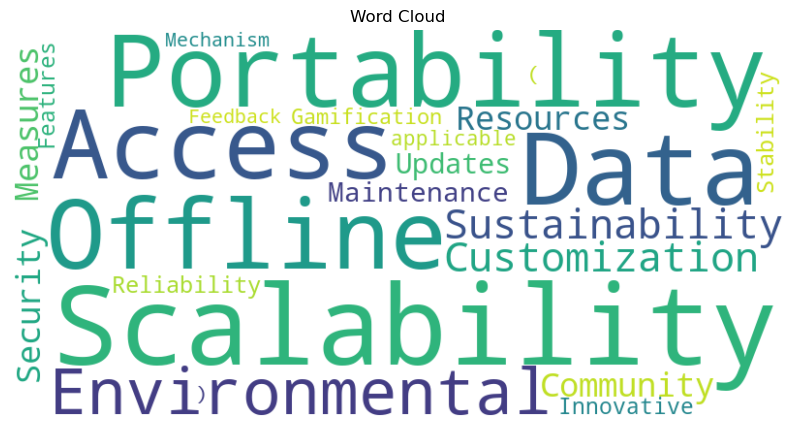

In [15]:
all_text = ' '.join(df8['Preferences'])
tokens = word_tokenize(all_text)
#Ignore the stop words
stop_words = set(['and', 'if','user','options','regular'])
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
freq_dist = FreqDist(filtered_tokens)
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

- Most users have Scalability and Portability as their Preference!

## Thank You!
